# Ruina gracza
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a = b = 50 i p = 1/2 i 1/5.

Proszę wyznaczyć rozkład kapitału gracza A po n krokach rozgrywki w trzech przypadkach:
n = 10, L_śr/2, 0.9 L_śr
gdzie L_śr to średnia długość trwania rozgrywki wyznaczona w poprzednich zadaniach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_game(max_game_duration, a_fortune, b_fortune, p):
    duration = 0
    while a_fortune > 0 and b_fortune > 0 and duration != max_game_duration:
        duration += 1
        a_status = np.random.uniform(0, 1) < p
        a_fortune += 1 if a_status else -1
        b_fortune += -1 if a_status else 1 
    return a_fortune

In [3]:
def simulation(game_num, max_game_duration, a_fortune, b_fortune, p):
    a_fortunes = []
    for _ in range(game_num):
        a_fortunes.append(single_game(max_game_duration, a_fortune, b_fortune, p))
    return a_fortunes

In [4]:
def draw_histogram(p, max_duration):
    game_num = 10000
    a_init_fortune = 50
    b_init_fortune = 50
    
    a_fortunes = simulation(game_num, max_duration, a_init_fortune, b_init_fortune, p)
    
    std_h = np.std(a_fortunes)
    bin_width = (3.49 * std_h) / (np.cbrt(game_num))
    bins_num = int((np.max(a_fortunes) - np.min(a_fortunes)) / bin_width)

    plt.figure(figsize=(9,5))
    plt.hist(a_fortunes, bins=bins_num, weights=np.ones(len(a_fortunes))/len(a_fortunes))
    
    plt.title(f'Player A fortune distribution for p = {p} and after {max_duration} iterations')
    plt.xlabel('Player A fortune')
    plt.ylabel('Probability')
    plt.show()

### p = 1/2, max_duration = 10

In [5]:
p = 1/2
avg_duration = 2540

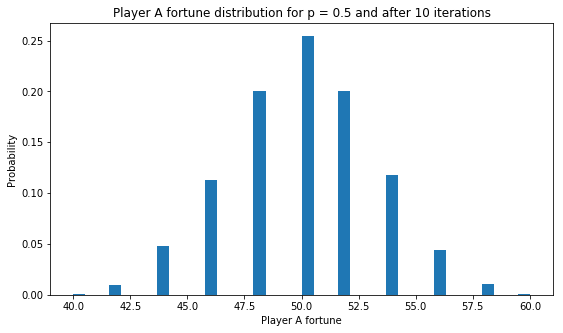

In [6]:
max_duration = 10
draw_histogram(p, max_duration)

### p = 1/2, max_duration = avg_duration / 2

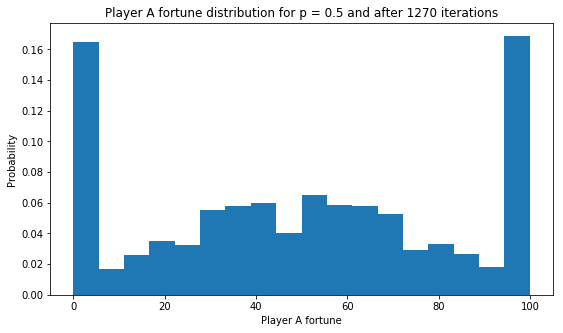

In [7]:
max_duration = int(np.floor(avg_duration / 2))
draw_histogram(p, max_duration)

### p = 1/2, max_duration = 0.9 * avg_duration

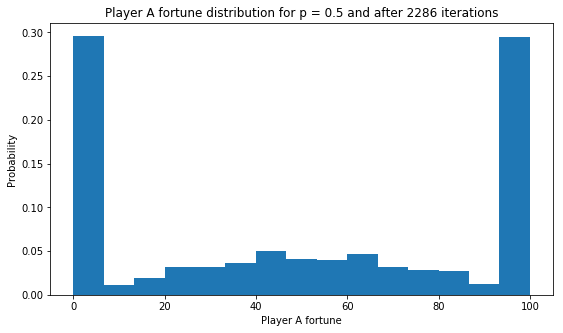

In [8]:
max_duration = int(np.floor(0.9 * avg_duration))
draw_histogram(p, max_duration)

### p = 1/5, max_duration = 10

In [9]:
p = 1/5
avg_duration = 83

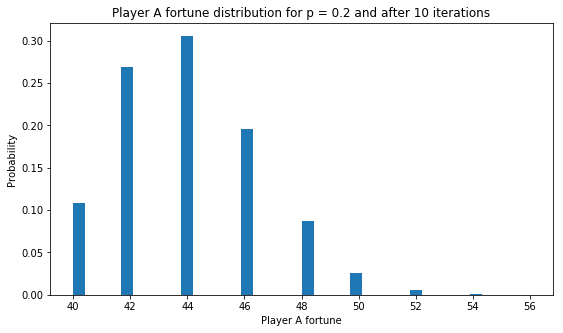

In [10]:
max_duration = 10
draw_histogram(p, max_duration)

### p = 1/5, max_duration = avg_duration / 2

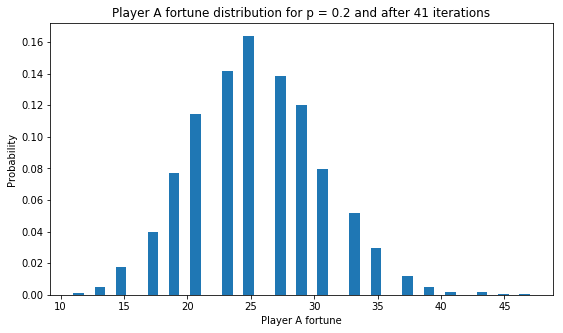

In [11]:
max_duration = int(np.floor(avg_duration / 2))
draw_histogram(p, max_duration)

### p = 1/5, max_duration = 0.9 * avg_duration

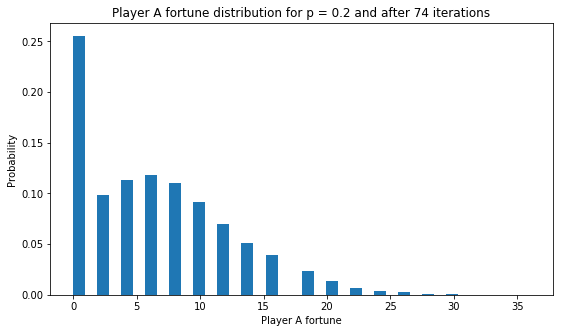

In [12]:
max_duration = int(np.floor(0.9 * avg_duration))
draw_histogram(p, max_duration)